# Project: Big Mart Sales EDA
### This project was made as a part of the Egypt FWD of 2020
###### Author : Group 4

<hr>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>

- Introduction and imposing questions.
    
<li><a href="#wrangling">Data Wrangling</a></li>

- Data Investigation.
    
- Data Cleaning & manipulation.
    
- Reviewing formating & Structure Issues.

<li><a href="#eda">Exploratory Data Analysis</a></li>

- Correlation overview.
    
- Defining the first question.
    
- Defining the second question.
       

<li><a href="#conclusions">Conclusions</a></li>

- General conclusion on questions and insights.
    
- Data Limitations.
    
- Future suggestions for dataset.

</ul>

<hr>

### Sources: 
* [Big Mart Sales](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement)

<a id='intro'></a>
## Introduction

> In this project we are going to clean, investigate, explore and analysing Big Mart Sales for correlations as well as extracting some insights and trends from the valid data.
>The main objective of this project is to answer 4 questions related to this dataset.
 
- General main question - Which attributes contribute to the increase of item sales in each outlet?
- Firstly, Does Item fat content affect sales?
- Secondly, Does store establishment year affect sales?
- Thirdly, Which Item types are sold the most?
- Fourthly, Does Item Visibility affect sales?

#### Installing ***'fuzzywuzzy'*** library for text extraction and processing

In [3]:
!pip install fuzzywuzzy

## Imports and Datasets
<hr> 
 
 * Pandas : for dataset handeling.
 * Numpy : Support for Pandas and calculations.
 * FuzzyWuzzy: for text manipulation and correction.
 * Matplotlib : for visualization (basic).
 * Seaborn : For visualization (Intermediate)
 * plotly : for interative plots.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fuzzywuzzy.process as fp
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sn

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Defining Functions 
<hr>

* ***ecdf() :***                     for CDF calculation
<hr>

In [5]:
# Defining ecdf Function for Cumilative Distribution Function
def ecdf(data):
    #credits DataCamp Justin Bois
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [6]:
# Defining ecdf plotting function between two variables
def ecdf_plot(c1,c2,t1='First set',t2='Second set'):
  #Using ecdf to compute the CDF
  x1,y1 = list(ecdf(c1))
  x,y = list(ecdf(c2))

  #Create a subplot to fit two axis
  fig = make_subplots(rows=1, cols=2,subplot_titles=(f'Cumulative distribution function of {t1}', f'Cumulative distribution function of {t2}'))

  #add first plot of Budget
  fig.add_trace(
      go.Scatter(x= x1,y = y1,name = f'CDF of {t1}'),
      row=1, col=1
  )

  #add second plot of Revenue
  fig.add_trace(
      go.Scatter(x = x,y = y,name = f'CDF of {t2}'),
      row=1, col=2
  )

  #control title and figure dimentions
  fig.update_layout(height=500, width=1000, title_text="Cumulative distribution functions")
  fig.show()

<a id='wrangling'></a>
## Data Wrangling

### Importing & Investigating

In [8]:
# Importing train data as a DataFrame
train = pd.read_csv('train.csv')

In [9]:
# Exploring data visually for identification
display(train.head())
display(train.describe())
display(train.info())
display(train.nunique())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Quick conclusions:

- Outlet size has too many missing values and does not contribute to our analysis at hand and thus could be dropped.

- Item weight missing data could be interpolated from the average of the rest of the products, posing minimum damage and preserving said data.

- Outlet Establishment ranges from 1985 to 2009.

- Item Fat Content has inconsistant entries and should be addressed.

- There are 1559 different Items in stores

- There are 2 Item Fat Content categories (data entry error)

- There are 16 Item types
 
- There are 10 Outlets in the dataset

- There are 3 different Outlet sizes and location types and 4 outlet types


<hr>

### Data Cleaning

##### Problems to be solved

*There are -luckly- only two columns with missing data*:

1 - Item Weight column with 1,463 missing values and is an object type.

2 - Outlet size with 2,410 missing values.

3 - Item Fat Content with 5 unique values where there is only 2 actual values.

In [10]:
# Converting Data type to float
train.Item_Weight.astype('float')

# Filling missing data in Item_Weight column with the mean of the valid data thus saving missing data
train.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)



In [14]:
# Dropping Outlet_Size Column with too many missing data and minimum contribution to analysis
train.drop('Outlet_Size',axis=1,inplace=True);

KeyError: ignored

In [12]:
# Remapping correct categories to Item_Fat_Content Column

# Checking Current state of column
display(train.Item_Fat_Content.unique())

# Correcting categories using fuzzywuzzy
cat = ['Low Fat','Regular']

for fat in cat:
    # Find matches in Item_Fat_Content of train
    matches = fp.extract(fat, train['Item_Fat_Content'], limit = len(train['Item_Fat_Content']))
    for m in matches:
        if m[1] >= 44:
          # Find matching fat type
          matching_fat = train['Item_Fat_Content'] == m[0]
          train.loc[matching_fat, 'Item_Fat_Content'] = fat

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
# Checking current state of dataframe
display(train.head())
display(train.describe())
display(train.info())
display(train.nunique())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


None

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<a id ='eda'></a>
## Exploratory Data Analysis

In [16]:
# Categorization analysis and correlation.
fig = px.parallel_categories(train)
fig.show()

#### Quick conclusions:

- 60% of Outlets are Supermarket Type 1 and only one Supermarket Type 3 and one Supermarket Type 2.

- Outlets location types are divided equally between Tier 1 and 2 with 30% each and 40% in Tier 3.

- Diagram shows relationship between each feature and their counts.

<hr>

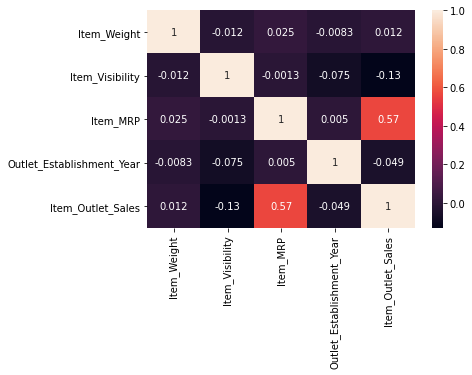

In [17]:
# Correlation analysis
sn.heatmap(train.corr(), annot=True);

### Correlation does not imply causation

- Correlation diagram shows that Item_MRP has a high positive correlation value with Item_Outlet_Sales.

- While showing Significant negative correlation between Item_Visibility and Item_Outlet_Sales

- No other Correlations significantly stands out.

- Both Observations are to be expected, which credits the data with validation.

<hr>


In [18]:
# Plotting ECDF for Item Weights and MPR showing the distribution of data
ecdf_plot(train.Item_Weight,train.Item_MRP,'Item Weight','Item MPR')

In [19]:
# Plotting ECDF for Item Visibility and Outlet Sales showing the distribution of data
ecdf_plot(train.Item_Visibility,train.Item_Outlet_Sales,'Item Visibility','Outlet Sales')

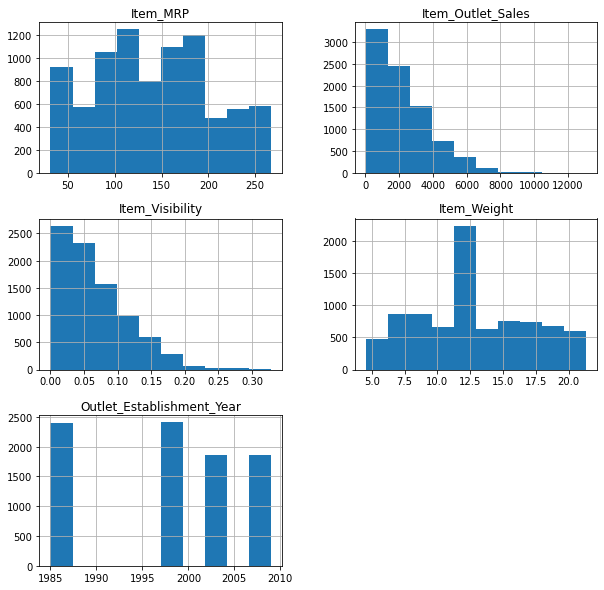

In [20]:
# Plotting Histograms for another perspective on the distribution of data through the Dataset
train.hist(figsize=(10,10));

### General Observations:

- ECDFs Shows uniform distribution of Item weights and Maximum Retail Price.

- While Showing biased distributions of Item Visibility and Outlet Sales with 80% of the data falling below third of the range.

- As histograms show similar results with Item Visibility and Outlet Sales right skewed and Item weights and Maximum Retail Price Uniformly distributed.

### Does Item fat content affect sales?

In [46]:
# Subsetting data to show sum and count of each Fat type Item
_ = train.pivot_table(index=['Item_Fat_Content'],aggfunc=['count','sum'],values='Item_Outlet_Sales').reset_index()

# Displaying Table with Blue styling for visual comparison
display(_.style.background_gradient(cmap='Blues'))

# Plotting a quick bar plot to visualize the difference in sales for each type
fig = px.bar(data_frame=_,x='Item_Fat_Content',y='sum',color='count',title = 'Total Sales Per Fat Content Type')
fig.show()

,Item_Fat_Content,count,sum
,,Item_Outlet_Sales,Item_Outlet_Sales
0,Low Fat,5517,11904094.533000
1,Regular,3006,6687030.877400


#### General Observations:

- Low Fat Content Items are sold significantly more than Regular Fat Content with both higher price and more quantity

### Does store establishment year affect sales?

In [59]:
# Plotting the relationship between Outlets ID and Item Sales with Outlet Establishment Year as the third dimension (color)

# Subsetting the data to total sales per Outlet per Establishment year
_ = train.pivot_table(index=['Outlet_Establishment_Year','Outlet_Identifier','Outlet_Type'],aggfunc=['sum'],values='Item_Outlet_Sales').reset_index()

# # Plotting A bar chart to visualize the relationship between both parameters with respect to the outlet number per year
fig = px.bar(data_frame=_,x='Outlet_Identifier',y='sum',color='Outlet_Establishment_Year',hover_data=[_.Outlet_Type],title = 'Relationship between Total Sales per Outlet & Year of Establishment')
fig.show()

#### General Observations:

- Outlets in same Outlet Type has similar total sales regardless of establishment year.

- Grocery Stores Outlets has the least Total sales, While Supermarket Type 3 has the highest.

- Establishment year has no observable effect on total sales, with given data.

### Which Item types are sold the most?

In [43]:
# Subsetting Data by grouping, summing total sales per item
_ = train[['Item_Identifier','Item_Outlet_Sales','Item_Type']].groupby(['Item_Identifier','Item_Type']).sum()

# Sorting values descendingly by total sales and filtering top 20
_ =_.sort_values('Item_Outlet_Sales',ascending = False).nlargest(20,'Item_Outlet_Sales').reset_index()

# Plotting a bar plot visualizing the relationship between top 20 items as well as identifying their Item Type
fig = px.bar(data_frame=_,x='Item_Identifier',y='Item_Outlet_Sales',color='Item_Type',title = 'Top 20 Items Sales')
fig.show()

#### General Observations:

- Top Item sold is of Fruits and Vegetables type with 42K total sales.

- Of the top 20 the least selling item is also of Fruits and Vegetables type.

- Most common type of Item sold in the top 20 is Frozen Foods.

### Does Item Visibility affect sales?

In [21]:
# Plotting the relationship between Item Visibility and Outlet Sales with Outlet Type as the third dimension (color)
fig = px.scatter(data_frame=train,y='Item_Visibility',x='Item_Outlet_Sales',color='Outlet_Type',hover_data=['Item_Identifier'],title = 'Relationship between Visibility & Sales')
fig.show()

#### General Observations:

- Visibility of item has minimum to no effect on total sales, with given data.

- Grocery Stores Outlets has the least total sales yet the highest visibility for its Items.

- Supermarket Type 3 has the most Sales with least visibility.

<a id='conclusions'></a>
## Conclusions

- Data given suggests two key features contributing to total sales.

- Total sales is affected by Item Fat Content and Outlet Type.

- Data also suggests minimum correlation between visibility and Item Sales.

- Data also suggests high dependance on outlet type, yet highest selling outlet type only occurs once.

<hr>

### Data Limitations:

- Insufficent description of each Item leads to inconclusive item oriented data analysis.

- Missing dates for each transaction limits timeseries analysis and future predictions based on previous data.

- Data entry errors could be easily fixed yet should be avoided in the first place.

- Missing item cost and fixed price cripple analysis of budget control and profit analysis. 

<hr>

### Recommendations for future analysis:
#### (Feature Engineering)


- Future analysis should include Outlet location relationship with Outlet types.

- The Impact of Outlet location on total sales.

- Normalizing data and processing it for machine learning regression model aiming to predict Total sales per outlet based on several features.